<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/PAPERBANANA_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dwzhu-pku.github.io/PaperBanana/

In [ ]:
!pip install -q google-generativeai
!pip install -U google-genai

## CASE1

🍌 [Planner Agent] Extracting logic via Gemini 2.0...
✅ Logic Extracted: ['Multi-Scale Feature Extraction', 'Cross-Modal Fusion (Audio & Video)', 'Banana-Transformer Sequence Modeling', 'Dense Prediction Map Generation (Semantic Segmentation)']


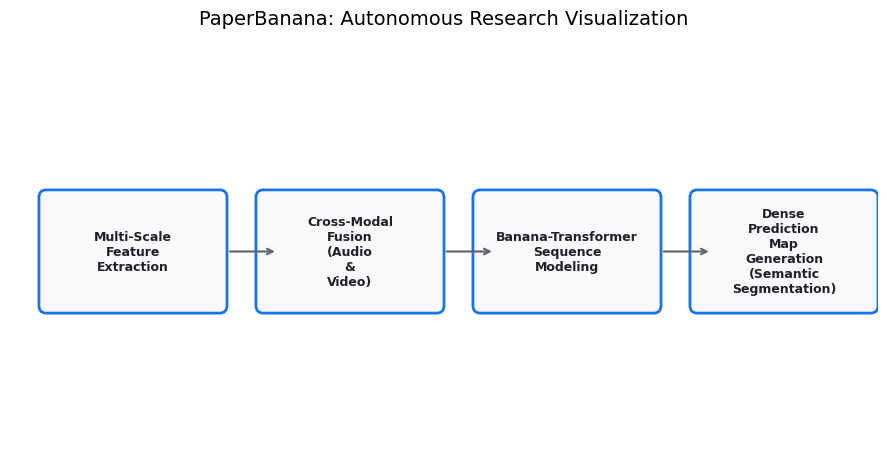

In [1]:
from google import genai
from google.colab import userdata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

# --- 1. SETUP ---
try:
    # Accessing your secret key
    api_key = userdata.get('GEMINI')
    client = genai.Client(api_key=api_key)
except Exception as e:
    print(f"Key Error: Ensure you have a secret named 'GEMINI' in the Colab sidebar. \n{e}")

def run_paper_banana_final(text_input):
    print("🍌 [Planner Agent] Extracting logic via Gemini 2.0...")

    # We instruct the model to act as the 'Planner' from the PaperBanana framework
    prompt = f"""
    You are the Planner Agent for PaperBanana.
    Analyze the methodology below and extract a sequence of 4-6 key technical steps.
    Return ONLY a raw JSON list of strings.

    Text: {text_input}
    """

    try:
        # Phase 1: LLM Reasoning
        response = client.models.generate_content(
            model='gemini-2.0-flash',
            contents=prompt
        )

        # Phase 2: Logic Parsing
        # The new SDK response.text is directly accessible
        raw_text = response.text.strip().replace('```json', '').replace('```', '')
        steps = json.loads(raw_text)
        print(f"✅ Logic Extracted: {steps}")

        # Phase 3: Visualizer Agent (Local Rendering)
        fig, ax = plt.subplots(figsize=(len(steps) * 2.8, 5))
        ax.set_xlim(0, len(steps) * 3)
        ax.set_ylim(0, 5)
        ax.axis('off')

        for i, step in enumerate(steps):
            x = 0.5 + (i * 3)
            # Stylist Agent: Applying the Blue/Grey Academic Theme
            rect = patches.FancyBboxPatch((x, 1.8), 2.4, 1.4, boxstyle="round,pad=0.1",
                                        ec="#1a73e8", fc="#f8f9fa", lw=2)
            ax.add_patch(rect)

            # Text layout
            label = step.replace(" ", "\n")
            ax.text(x + 1.2, 2.5, label, ha='center', va='center',
                    fontweight='bold', fontsize=9, color="#202124")

            # Connectivity Logic
            if i < len(steps) - 1:
                ax.annotate('', xy=(x + 3.2, 2.5), xytext=(x + 2.5, 2.5),
                            arrowprops=dict(arrowstyle='->', color='#5f6368', lw=1.5))

        plt.title("PaperBanana: Autonomous Research Visualization", fontsize=14, pad=25)
        plt.show()

    except Exception as e:
        print(f"❌ Pipeline Error: {e}")

# --- THE REAL TEST ---
raw_research = """
Our model architecture begins with a Multi-Scale Feature Extractor.
These features are then fed into a Cross-Modal Fusion module to integrate
audio and video signals. Next, we employ a Banana-Transformer for
sequence modeling. Finally, the system produces a dense prediction map
for semantic segmentation.
"""

run_paper_banana_final(raw_research)

## CASE2

🍌 [Planner Agent]: Extracting core logic...
🍌 [Critic Agent]: Reviewing steps for visual clarity...
✅ Finalized by Critic: ['Multi-Scale Feature Extraction', 'Cross-Modal Fusion', 'Banana-Transformer', 'Dense Prediction']


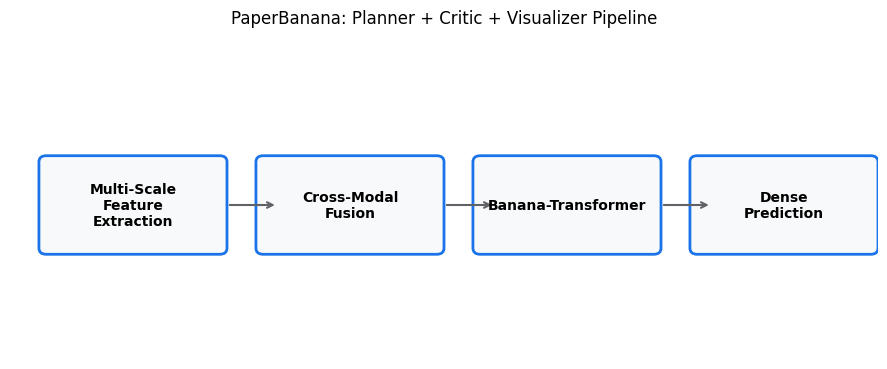

In [2]:
from google import genai
from google.colab import userdata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

# --- SETUP ---
api_key = userdata.get('GEMINI')
client = genai.Client(api_key=api_key)

def run_paper_banana_with_critic(text_input):
    print("🍌 [Planner Agent]: Extracting core logic...")

    # PHASE 1: PLANNING
    plan_prompt = f"Extract 4-6 technical steps from this text as a JSON list of strings: {text_input}"
    plan_response = client.models.generate_content(model='gemini-2.0-flash', contents=plan_prompt)
    raw_steps = json.loads(plan_response.text.strip().replace('```json', '').replace('```', ''))

    # PHASE 2: THE CRITIC (New!)
    print(f"🍌 [Critic Agent]: Reviewing steps for visual clarity...")
    critic_prompt = f"""
    Review these diagram labels: {raw_steps}.
    If a label is longer than 3 words, shorten it to a concise technical term suitable for a small box.
    Return the finalized JSON list of strings only.
    """
    critic_response = client.models.generate_content(model='gemini-2.0-flash', contents=critic_prompt)
    final_steps = json.loads(critic_response.text.strip().replace('```json', '').replace('```', ''))

    print(f"✅ Finalized by Critic: {final_steps}")

    # PHASE 3: VISUALIZER
    fig, ax = plt.subplots(figsize=(len(final_steps) * 2.8, 4))
    ax.set_xlim(0, len(final_steps) * 3)
    ax.set_ylim(0, 5)
    ax.axis('off')

    for i, step in enumerate(final_steps):
        x = 0.5 + (i * 3)
        # Box & Text
        ax.add_patch(patches.FancyBboxPatch((x, 1.8), 2.4, 1.4, boxstyle="round,pad=0.1", ec="#1a73e8", fc="#f8f9fa", lw=2))
        ax.text(x + 1.2, 2.5, step.replace(" ", "\n"), ha='center', va='center', fontweight='bold', fontsize=10)
        # Arrow
        if i < len(final_steps) - 1:
            ax.annotate('', xy=(x + 3.2, 2.5), xytext=(x + 2.5, 2.5), arrowprops=dict(arrowstyle='->', color='#5f6368', lw=1.5))

    plt.title("PaperBanana: Planner + Critic + Visualizer Pipeline", fontsize=12, pad=20)
    plt.show()

# --- RUN ---
research_text = "First we use Multi-Scale Feature Extraction, then Cross-Modal Fusion of Audio and Video, then Banana-Transformer Modeling, and finally Dense Prediction Map Generation."
run_paper_banana_with_critic(research_text)

## CASE3

🍌 [Planner Agent]: Analyzing high-complexity methodology...
🍌 [Critic Agent]: Optimization for LaTeX-ready clarity...
✅ Stress Test Result: ['Dual-Stream ResNet', 'Gated Cross-Attn', 'VAE Reg. (Warmup)', 'Latent Inj. w/ HPPO', 'HPPO Policy Opt.', 'Auton. Nav. Policy']


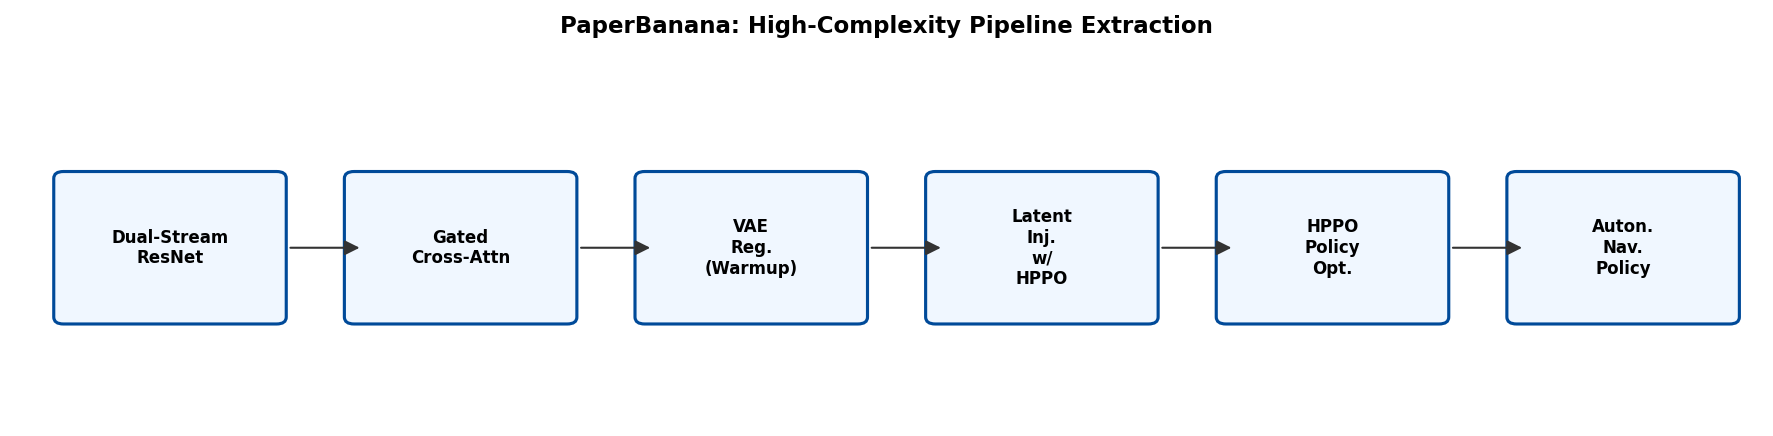

In [3]:
from google import genai
from google.colab import userdata, files
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

# --- SETUP ---
client = genai.Client(api_key=userdata.get('GEMINI'))

def run_sophisticated_banana_test(complex_text):
    print("🍌 [Planner Agent]: Analyzing high-complexity methodology...")

    # PHASE 1: PLANNING (Deep Extraction)
    plan_prompt = f"""
    Analyze this sophisticated research text. Extract the technical pipeline as 5-7 logical nodes.
    Ensure you capture the transition from raw data to the final objective.
    Return ONLY a JSON list of strings.
    Text: {complex_text}
    """
    plan_resp = client.models.generate_content(model='gemini-2.0-flash', contents=plan_prompt)
    raw_steps = json.loads(plan_resp.text.strip().replace('```json', '').replace('```', ''))

    # PHASE 2: THE CRITIC (Visual Optimization)
    print(f"🍌 [Critic Agent]: Optimization for LaTeX-ready clarity...")
    critic_prompt = f"""
    Shorten these labels for a professional academic figure.
    Use standard AI abbreviations where possible (e.g., 'CNN', 'RL', 'Transformer').
    Ensure no label exceeds 15 characters.
    Labels: {raw_steps}
    Return finalized JSON list.
    """
    critic_resp = client.models.generate_content(model='gemini-2.0-flash', contents=critic_prompt)
    final_steps = json.loads(critic_resp.text.strip().replace('```json', '').replace('```', ''))

    print(f"✅ Stress Test Result: {final_steps}")

    # PHASE 3: SOPHISTICATED VISUALIZER (Vector Output)
    plt.rcParams["font.family"] = "sans-serif"
    fig, ax = plt.subplots(figsize=(len(final_steps) * 2.5, 3), dpi=150)
    ax.set_xlim(0, len(final_steps) * 3)
    ax.set_ylim(0, 5)
    ax.axis('off')

    for i, step in enumerate(final_steps):
        x = 0.5 + (i * 3)
        # Stylist: Gradient-like blue border and clean fill
        ax.add_patch(patches.FancyBboxPatch((x, 1.5), 2.2, 2.0, boxstyle="round,pad=0.1",
                                            ec="#004a99", fc="#f0f7ff", lw=1.5))
        ax.text(x + 1.1, 2.5, step.replace(" ", "\n"), ha='center', va='center',
                fontweight='600', fontsize=8, color="#000000")

        if i < len(final_steps) - 1:
            ax.annotate('', xy=(x + 3.1, 2.5), xytext=(x + 2.3, 2.5),
                        arrowprops=dict(arrowstyle='-|>', color='#333333', lw=1, mutation_scale=15))

    plt.title("PaperBanana: High-Complexity Pipeline Extraction", fontsize=11, fontweight='bold', pad=20)

    # Save as PDF (Vector Graphics)
    filename = "sophisticated_pipeline.pdf"
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    plt.show()

    # Uncomment to trigger download in Colab
    # files.download(filename)

# --- THE SOPHISTICATED STRESS TEST ---
complex_methodology = """
The architecture leverages a Dual-Stream ResNet-50 backbone for simultaneous spatial and temporal
feature acquisition. These feature maps are integrated via a Gated Cross-Attention mechanism
to resolve modal misalignment. Following integration, the latent representations are injected
into a Hierarchical Proximal Policy Optimization (PPO) agent that navigates a discrete
action space. To ensure stability, a Variational Autoencoder (VAE) regularizes the latent
space during the warmup phase, eventually producing a specialized policy for autonomous navigation.
"""

run_sophisticated_banana_test(complex_methodology)

## CASE4

🍌 [Planner Agent]: Extracting Sovereign AI Logic...
🍌 [Critic Agent]: Refining for visual clarity...
✅ Sovereign AI Workflow (Sanitized): ['Establish Trusted Execution', 'Differential Privacy Scrubbing', 'Federated Fine-Tuning', 'Validate Against Guardrails', 'Air-Gapped Model Deployment']


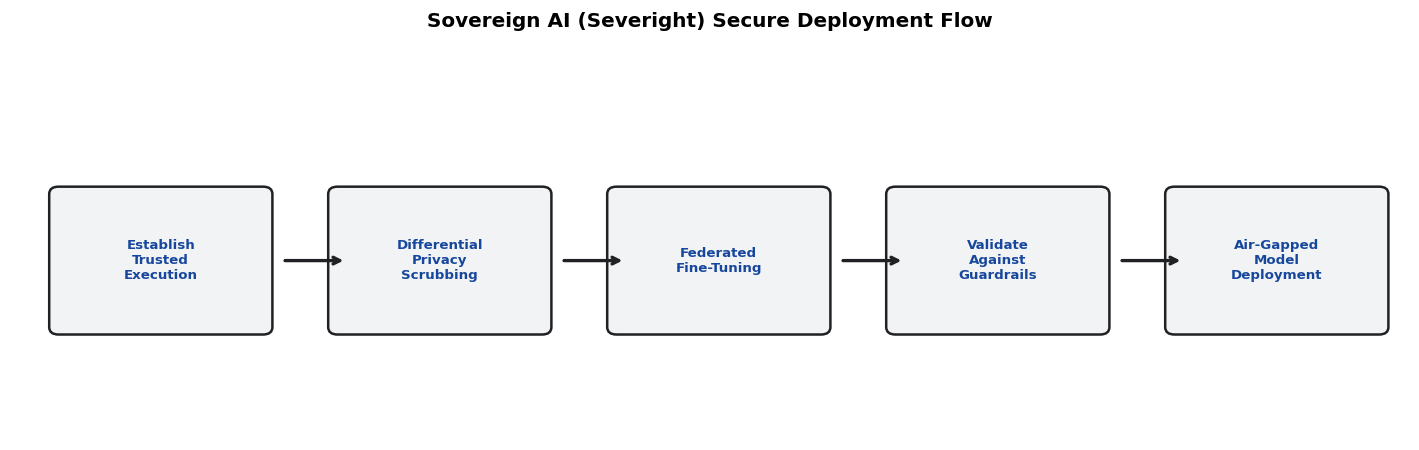

In [5]:
from google import genai
from google.colab import userdata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

# --- SETUP ---
client = genai.Client(api_key=userdata.get('GEMINI'))

def run_sovereign_ai_robust(sovereign_text):
    print("🍌 [Planner Agent]: Extracting Sovereign AI Logic...")

    plan_prompt = f"Extract the deployment flow for this Sovereign AI text as a JSON list of strings: {sovereign_text}"
    plan_resp = client.models.generate_content(model='gemini-2.0-flash', contents=plan_prompt)
    raw_steps = json.loads(plan_resp.text.strip().replace('```json', '').replace('```', ''))

    print(f"🍌 [Critic Agent]: Refining for visual clarity...")
    critic_prompt = f"Refine these for a professional diagram (max 3 words each). Return a JSON list of strings: {raw_steps}"
    critic_resp = client.models.generate_content(model='gemini-2.0-flash', contents=critic_prompt)

    # Robust Parsing: Handle the case where the LLM returns dictionaries or strings
    raw_output = json.loads(critic_resp.text.strip().replace('```json', '').replace('```', ''))
    final_steps = []
    for item in raw_output:
        if isinstance(item, dict):
            final_steps.append(item.get('label', str(item)))
        else:
            final_steps.append(str(item))

    print(f"✅ Sovereign AI Workflow (Sanitized): {final_steps}")

    # --- VISUALIZER ---
    fig, ax = plt.subplots(figsize=(len(final_steps) * 3, 4), dpi=120)
    ax.set_xlim(0, len(final_steps) * 3)
    ax.set_ylim(0, 5)
    ax.axis('off')

    colors = {"box": "#f1f3f4", "border": "#202124", "text": "#17479d"}

    for i, step in enumerate(final_steps):
        x = 0.5 + (i * 3)
        ax.add_patch(patches.FancyBboxPatch((x, 1.5), 2.2, 1.8, boxstyle="round,pad=0.1",
                                            ec=colors["border"], fc=colors["box"], lw=1.5))

        # Now step is guaranteed to be a string!
        display_text = step.replace(" ", "\n")
        ax.text(x + 1.1, 2.4, display_text, ha='center', va='center',
                fontweight='700', fontsize=8, color=colors["text"])

        if i < len(final_steps) - 1:
            ax.annotate('', xy=(x + 3.1, 2.4), xytext=(x + 2.4, 2.4),
                        arrowprops=dict(arrowstyle='->', color=colors["border"], lw=2))

    plt.title("Sovereign AI (Severight) Secure Deployment Flow", fontsize=12, fontweight='bold', pad=25)
    plt.show()

# --- THE TEST ---
severight_ai_text = """
The Severight AI framework begins by establishing a Trusted Execution Environment (TEE)
on local sovereign infrastructure. Then datasets undergo Differential Privacy scrubbing.
Next is Federated Fine-Tuning. The weights are validated against national guardrails.
Finally, the model is deployed via an air-gapped inference server.
"""

run_sovereign_ai_robust(severight_ai_text)

## CASE5

🍌 [Planner Agent]: Extracting Sequential Logic...
🍌 [Critic Agent]: Compressing for Vertical Column Layout...
✅ Vertical Workflow: ['Local TEE', 'Differential Privacy', 'Federated Fine-Tuning', 'Guardrail Validation', 'Air-Gapped Deployment']


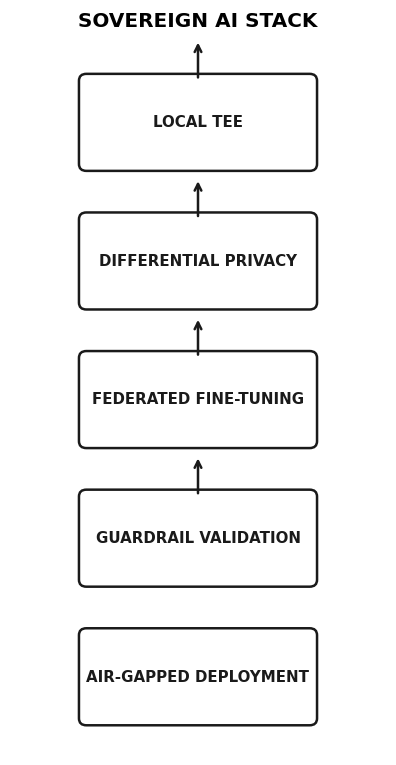

In [6]:
from google import genai
from google.colab import userdata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

# --- SETUP ---
client = genai.Client(api_key=userdata.get('GEMINI'))

def run_vertical_sovereign_ai(sovereign_text):
    print("🍌 [Planner Agent]: Extracting Sequential Logic...")

    # PHASE 1: PLANNING
    plan_prompt = f"Extract the Sovereign AI flow as a JSON list of strings: {sovereign_text}"
    plan_resp = client.models.generate_content(model='gemini-2.0-flash', contents=plan_prompt)
    raw_steps = json.loads(plan_resp.text.strip().replace('```json', '').replace('```', ''))

    # PHASE 2: THE CRITIC (Visual Compression)
    print("🍌 [Critic Agent]: Compressing for Vertical Column Layout...")
    critic_prompt = f"Shorten these to 1-3 words max. Return a JSON list of strings: {raw_steps}"
    critic_resp = client.models.generate_content(model='gemini-2.0-flash', contents=critic_prompt)

    # SCHEMA GUARD: Ensures we always have a list of strings
    raw_output = json.loads(critic_resp.text.strip().replace('```json', '').replace('```', ''))
    final_steps = [s.get('label', str(s)) if isinstance(s, dict) else str(s) for s in raw_output]

    print(f"✅ Vertical Workflow: {final_steps}")

    # PHASE 3: VERTICAL VISUALIZER
    # Height scales with the number of steps
    fig, ax = plt.subplots(figsize=(4, len(final_steps) * 1.5), dpi=120)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, len(final_steps) * 2)
    ax.axis('off')

    # Nature-inspired high-contrast theme
    colors = {"box": "#ffffff", "border": "#1a1a1a", "text": "#1a1a1a"}

    for i, step in enumerate(reversed(final_steps)):
        y_pos = 0.5 + (i * 2)
        # Draw the Stacked Boxes
        ax.add_patch(patches.FancyBboxPatch((1, y_pos), 3, 1.2, boxstyle="round,pad=0.1",
                                            ec=colors["border"], fc=colors["box"], lw=1.5))
        ax.text(2.5, y_pos + 0.6, step.upper(), ha='center', va='center',
                fontweight='800', fontsize=9, color=colors["text"])

        # Vertical Downward Arrows
        if i > 0:
            ax.annotate('', xy=(2.5, y_pos + 1.2), xytext=(2.5, y_pos + 1.8),
                        arrowprops=dict(arrowstyle='<-', color=colors["border"], lw=1.5))

    plt.title("SOVEREIGN AI STACK", fontsize=12, fontweight='bold', pad=20)
    plt.show()

# --- THE TEST ---
severight_ai_text = """
The Severight AI framework begins by establishing a Trusted Execution Environment (TEE)
on local sovereign infrastructure. Then datasets undergo Differential Privacy scrubbing.
Next is Federated Fine-Tuning. The weights are validated against national guardrails.
Finally, the model is deployed via an air-gapped inference server.
"""

run_vertical_sovereign_ai(severight_ai_text)

## CASE6

🍌 [Planner Agent]: Identifying decision nodes...


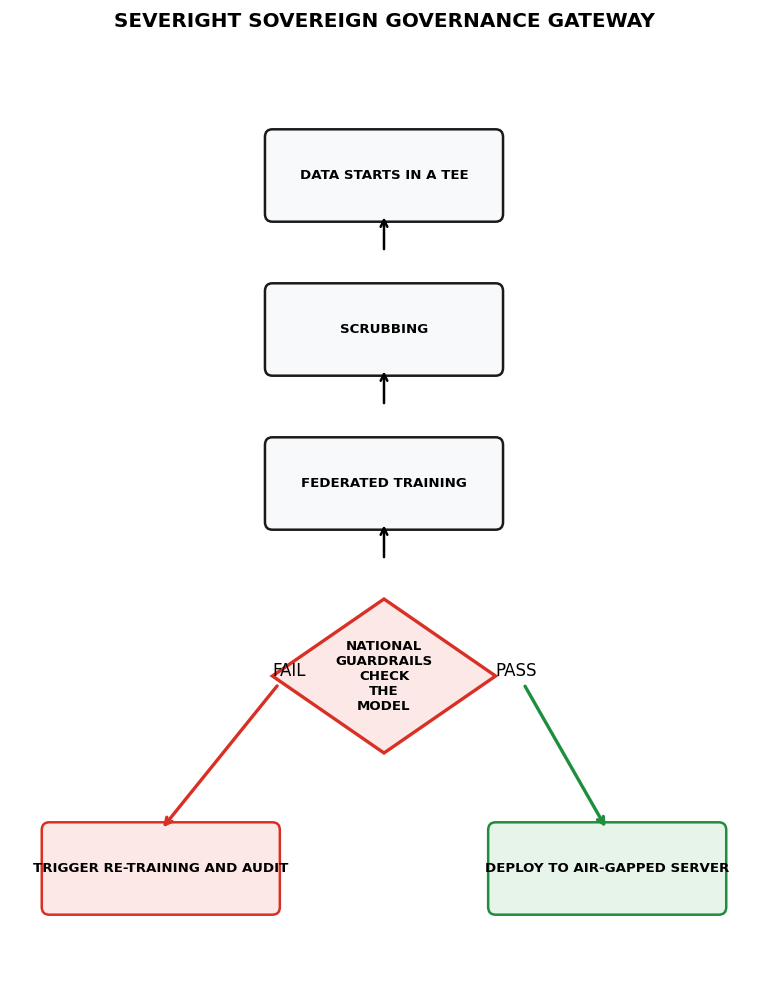

In [7]:
from google import genai
from google.colab import userdata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

client = genai.Client(api_key=userdata.get('GEMINI'))

def run_branching_sovereign_ai(text_input):
    print("🍌 [Planner Agent]: Identifying decision nodes...")

    # We ask the LLM specifically for a flow that includes a branch
    prompt = f"""
    Extract the Sovereign AI flow. Identify the 'National Guardrail' step as a decision point.
    Return a JSON object with:
    'steps': [list of steps before the guardrail],
    'decision': 'The guardrail step',
    'success': 'Next step if pass',
    'failure': 'Action if fail'
    Text: {text_input}
    """
    resp = client.models.generate_content(model='gemini-2.0-flash', contents=prompt)
    data = json.loads(resp.text.strip().replace('```json', '').replace('```', ''))

    # --- VISUALIZER ---
    fig, ax = plt.subplots(figsize=(8, 10), dpi=120)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 12)
    ax.axis('off')

    # 1. Draw Initial Steps (Vertical)
    y = 10
    for step in data['steps']:
        ax.add_patch(patches.FancyBboxPatch((3.5, y), 3, 1, boxstyle="round,pad=0.1", ec="#1a1a1a", fc="#f8f9fa", lw=1.5))
        ax.text(5, y + 0.5, step.upper(), ha='center', va='center', fontweight='bold', fontsize=8)
        ax.annotate('', xy=(5, y), xytext=(5, y-0.5), arrowprops=dict(arrowstyle='->', lw=1.5))
        y -= 2

    # 2. Draw Decision Diamond (The Guardrail)
    diamond_pts = [[5, y+1], [6.5, y], [5, y-1], [3.5, y]]
    ax.add_patch(patches.Polygon(diamond_pts, ec="#d93025", fc="#fce8e6", lw=2))
    ax.text(5, y, data['decision'].upper().replace(" ", "\n"), ha='center', va='center', fontweight='bold', fontsize=8)

    # 3. Draw Success Branch (Right then Down)
    ax.annotate('PASS', xy=(8, y-2), xytext=(6.5, y), arrowprops=dict(arrowstyle='->', color='#1e8e3e', lw=2))
    ax.add_patch(patches.FancyBboxPatch((6.5, y-3), 3, 1, boxstyle="round,pad=0.1", ec="#1e8e3e", fc="#e6f4ea", lw=1.5))
    ax.text(8, y-2.5, data['success'].upper(), ha='center', va='center', fontweight='bold', fontsize=8)

    # 4. Draw Failure Branch (Left then Down)
    ax.annotate('FAIL', xy=(2, y-2), xytext=(3.5, y), arrowprops=dict(arrowstyle='->', color='#d93025', lw=2))
    ax.add_patch(patches.FancyBboxPatch((0.5, y-3), 3, 1, boxstyle="round,pad=0.1", ec="#d93025", fc="#fce8e6", lw=1.5))
    ax.text(2, y-2.5, data['failure'].upper(), ha='center', va='center', fontweight='bold', fontsize=8)

    plt.title("SEVERIGHT SOVEREIGN GOVERNANCE GATEWAY", fontsize=12, fontweight='bold', pad=20)
    plt.show()

# --- RUN ---
severight_text = "Data starts in a TEE, followed by scrubbing and federated training. Then, national guardrails check the model. If it passes, deploy to air-gapped server. If it fails, trigger re-training and audit."
run_branching_sovereign_ai(severight_text)